In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [56]:
df = pd.read_csv("MS_Dhoni_ODI_record.csv")


In [58]:
 #Basic checks
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [60]:
#Data cleaning - Opposition name says 'v Aug' etc, we can remove 'v'
df['opposition'] = df['opposition'].apply(lambda x: x[2:])
df['opposition']
# df['opposition'] = df['opposition'].str.replace('v ', '', regex=False)
#Regex = False means the first string ('v ') is not regex but a literal string
# print(df['opposition'])

0       Bangladesh
1       Bangladesh
2       Bangladesh
3         Pakistan
4         Pakistan
          ...     
345    West Indies
346        England
347     Bangladesh
348      Sri Lanka
349    New Zealand
Name: opposition, Length: 350, dtype: object

In [123]:
#Add a 'feature' -  'year' column using match date column
#First date column to datetime formnat 
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df['year'] = df['date'].dt.year.astype(int)
df['year']

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int32

In [107]:
#Create a column to distinguish between out and not out
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)
df


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [97]:
#Dropping ODI number feature because it adds no value to analysis
df.drop(columns= 'odi_number')

#To delete the column from original dataframe
#df.drop(columns= 'odi_number', inplace= True)  #Permanent delete


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [105]:
df = df.drop(columns= 'odi_number')  # Better syntax

KeyError: "['odi_number'] not found in axis"

In [103]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [109]:
## creating new dataframe where score column will now not have DNB and TDNB records

df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]

In [111]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [113]:
## fixing data types of numerical columns
df_new['runs_scored']=  df_new['runs_scored'].astype(int)
df_new['balls_faced']=  df_new['balls_faced'].astype(int)
df_new['strike_rate']=  df_new['strike_rate'].astype(float)
df_new['fours']=  df_new['fours'].astype(int)
df_new['sixes']=  df_new['sixes'].astype(int)


In [115]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [117]:
## career Stats
first_match_date = df['date'].dt.date.min().strftime('%B %d %Y') ## first match
first_match_date

'December 23 2004'

In [125]:
last_match_date = df['date'].dt.date.max().strftime('%B %d %Y') #date of last match
last_match_date

'July 09 2019'

In [127]:
number_of_matches = df.shape[0] #number of matches played in career
print("Number of matches played : ",number_of_matches)

Number of matches played :  350


In [129]:
number_of_innings = df_new.shape[0]
print("number_of_innings played: ", number_of_innings)

number_of_innings played:  297


In [133]:
not_outs = df_new['not_out'].sum()
print("Not Outs : ", not_outs)

Not Outs :  84


In [135]:
run_scored = df_new['runs_scored'].sum()
print("Runs scored in career : ",run_scored )

Runs scored in career :  10773


In [137]:
balls_faced = df_new['balls_faced'].sum()
print('Balls faced in career:',balls_faced)

Balls faced in career: 12303


In [141]:
career_sr = (run_scored/balls_faced)*100 ###Career Strike Rate
print("Career Strike Rate: {:.2f}".format(career_sr))

Career Strike Rate: 87.56


In [143]:
career_avg = (run_scored / (number_of_innings-not_outs))
print("Career Average {:.2f}".format(career_avg))

Career Average 50.58


In [149]:
hunderds = (df_new['runs_scored'] >= 100).sum()
print("Number of hunderds : ", hunderds)

Number of hunderds :  10


In [151]:
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
print("Number of 50's:", fifties)


Number of 50's: 73


In [157]:
fours = df_new['fours'].sum()
print("number of fours:", fours)

number of fours: 826


In [155]:
sixes = df_new['sixes'].sum()
print("number of 6's:", sixes)

number of 6's: 229


In [159]:
df_new


,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [161]:
###plot number of matches played against different oppositions
# Count the occurances of each unigue value in the 'opposition' column
# opposition_counts will be the series with the labelled index as opposition 

opposition_counts = df['opposition'].value_counts()
print(opposition_counts)

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


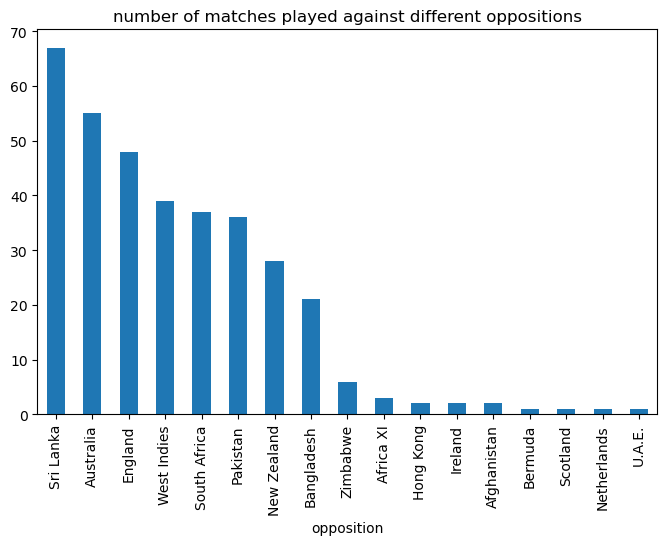

In [165]:
##plot the counts as a bar plot
opposition_counts.plot(kind = 'bar' , title = 'number of matches played against different oppositions',figsize=(8,5))
plt.show()

In [167]:
###Run scored against each team
##group the  dataframe by 'opposition' column

grouped_by_opposition = df_new.groupby('opposition')
# sum the runs_scored column for each group

sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


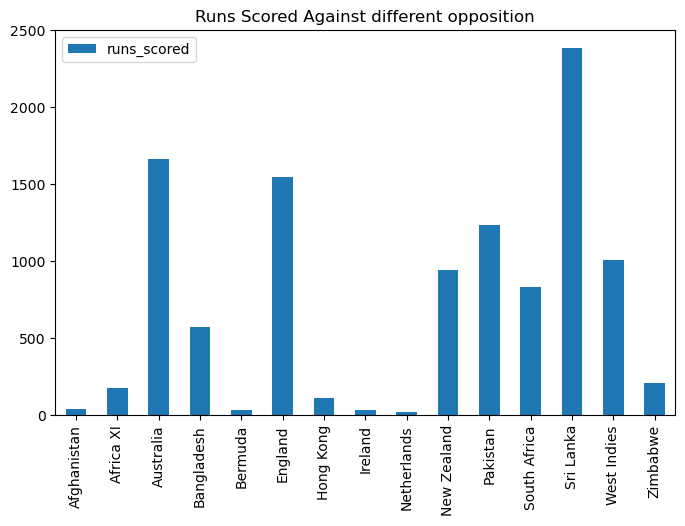

In [169]:
# sum of runs scored is a series with a labelled index, which is opposition
# Convert it into a dataframe and remove the index

runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x = 'opposition' , kind ='bar',title = 'Runs Scored Against different opposition', figsize=(8,5))
plt.xlabel(None);
plt.show()

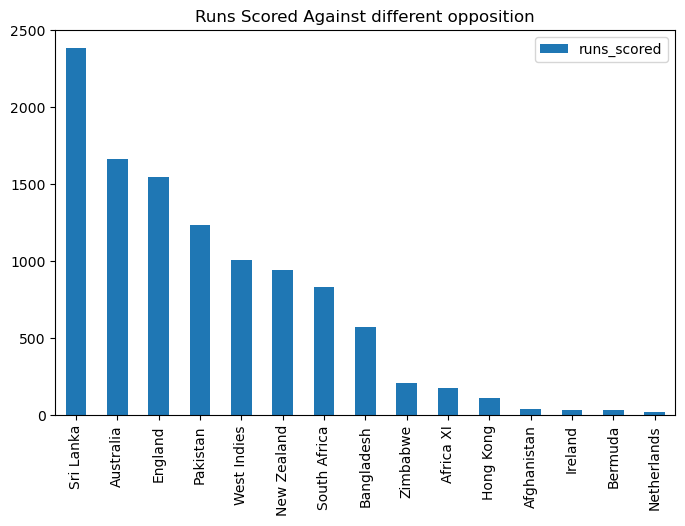

In [171]:
# Does Not look Good let us sort it
sorted = runs_scored_by_opposition.sort_values(by = 'runs_scored', ascending=False)
sorted.plot(x= 'opposition', kind = 'bar',title= 'Runs Scored Against different opposition', figsize=(8,5))
plt.xlabel(None);
plt.show()

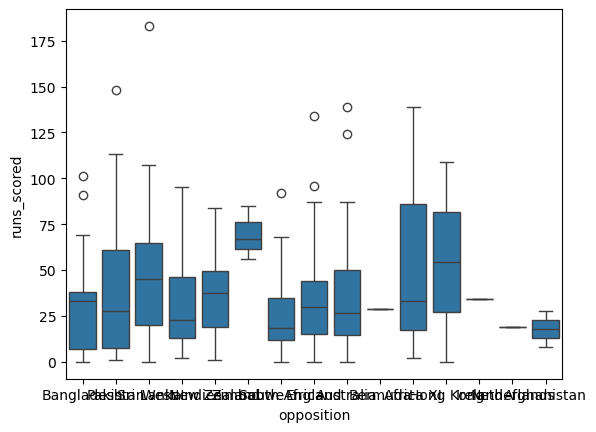

In [173]:
## Box plot of runs against various oppositions

sns.boxplot(x = 'opposition' , y = 'runs_scored', data = df_new)
plt.show()

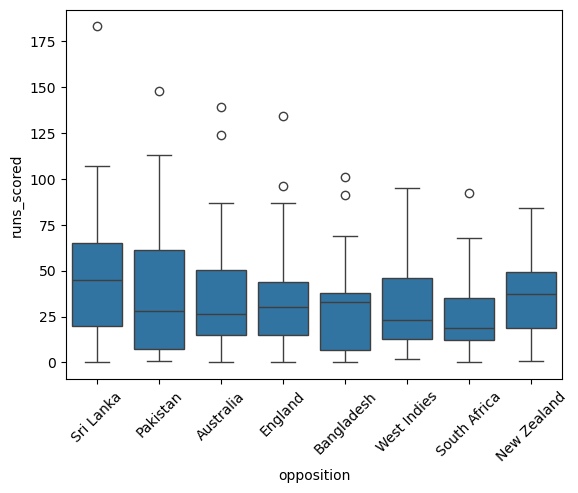

In [175]:
# looks crowded  lets retain only major countries
#List of oppositions to filter
opposition_list = ['England','Australia','West Indies','South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']
##filter rows where opposition i9s in list
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
df_filtered = df_filtered.sort_values(by = 'runs_scored', ascending = False)

sns.boxplot(x= 'opposition',y='runs_scored',data = df_filtered)
plt.xticks(rotation=45)
plt.show()

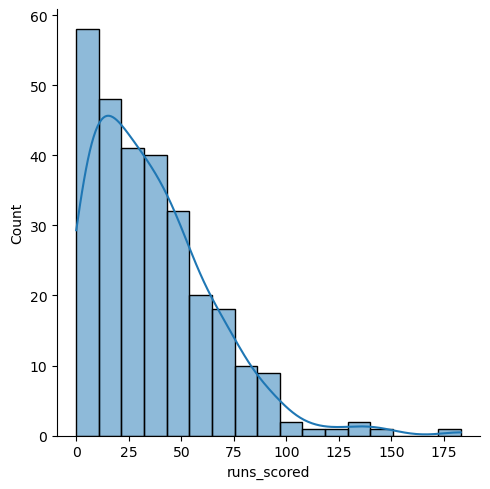

In [185]:
# histogram (distplot) with and without kde (kernal density estimation)

sns.displot(data = df_filtered , x = 'runs_scored' , kde = True)
plt.show()

In [187]:
# we see that there is a right/positive skew, so there is a long tail to the right
# skewed means ek side pr jyada data aur dusri side less data that means the data is not symmetric (which is not good)


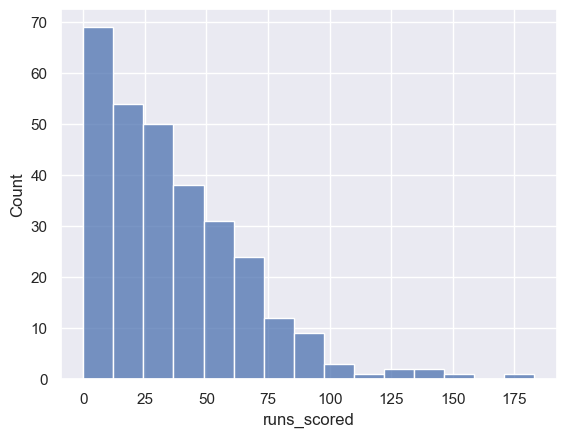

In [189]:
# Histogram with bins
sns.set(style='darkgrid')
sns.histplot(data = df_new,x='runs_scored',bins = 15)
plt.show()

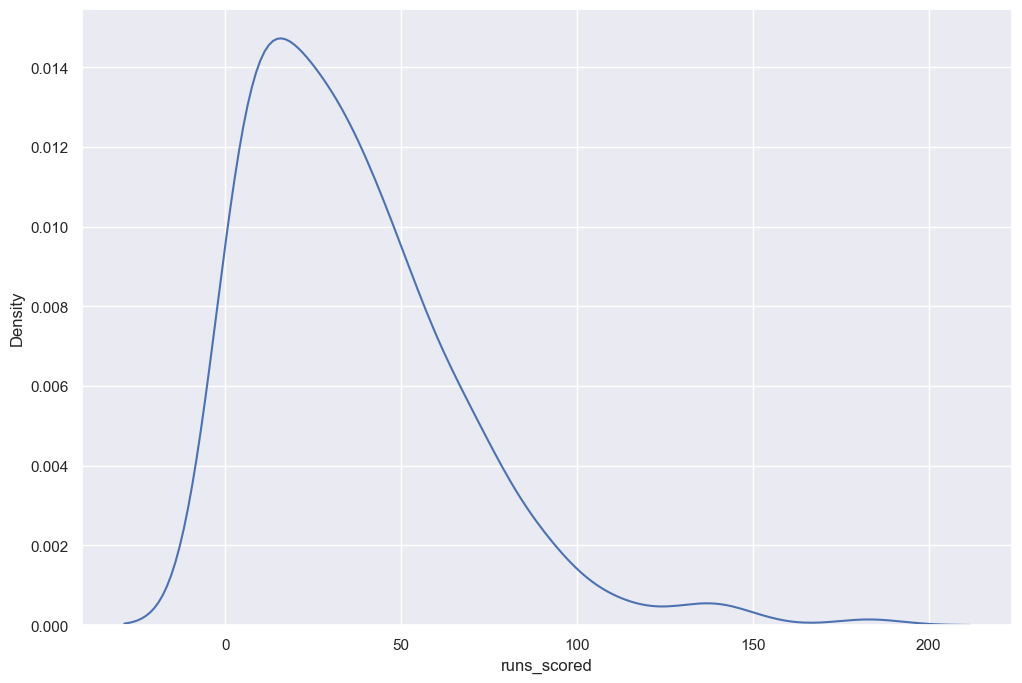

In [191]:
# KDE plot
plt.figure(figsize=(12,8))
sns.kdeplot(data = df_new, x= 'runs_scored')
plt.show()

<Axes: xlabel='runs_scored', ylabel='Density'>

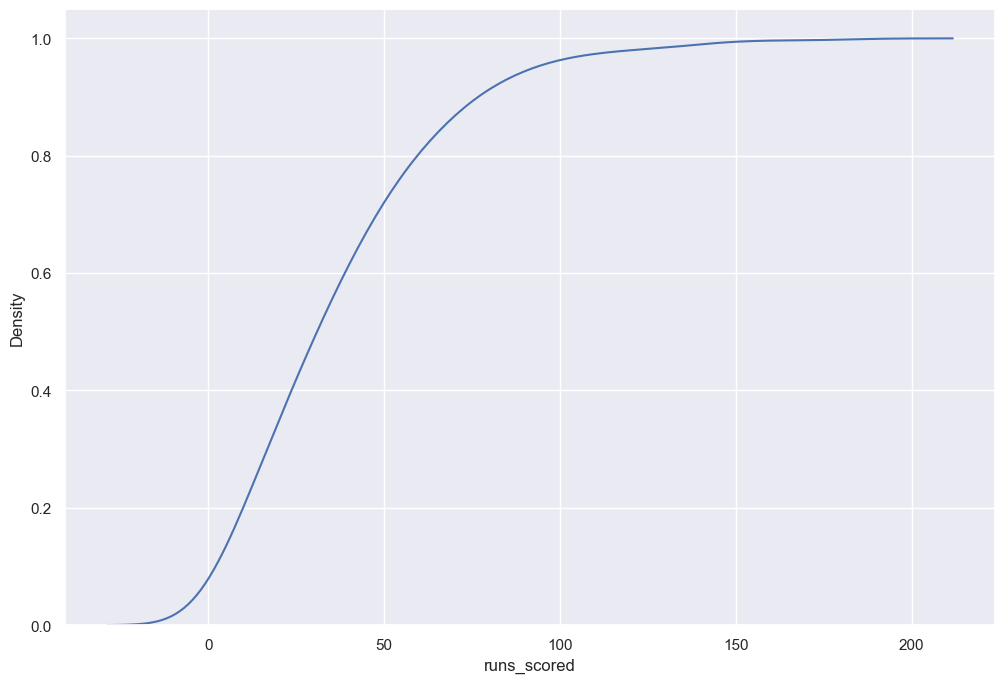

In [193]:
# KDE plot with cumulative probability
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x= 'runs_scored', cumulative=True)

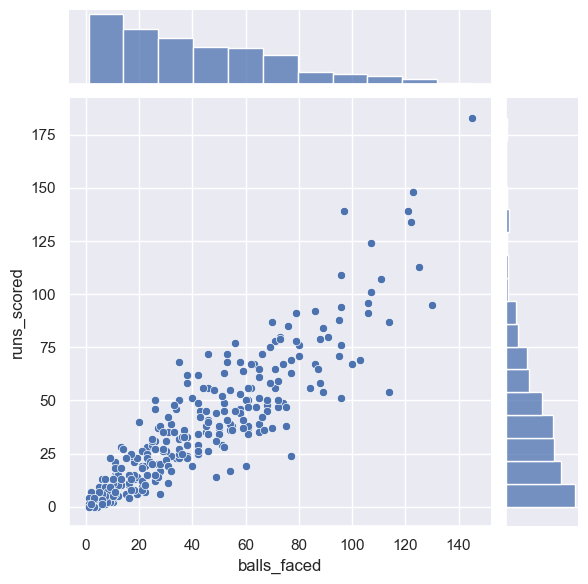

In [195]:
## jointplot

sns.jointplot(x= 'balls_faced', y = 'runs_scored',data = df_new, kind = 'scatter')
plt.show()

In [197]:
#Heatmap 
#Calculate the correlation matrix

correlation_matrix = df_new[['balls_faced','runs_scored']].corr()


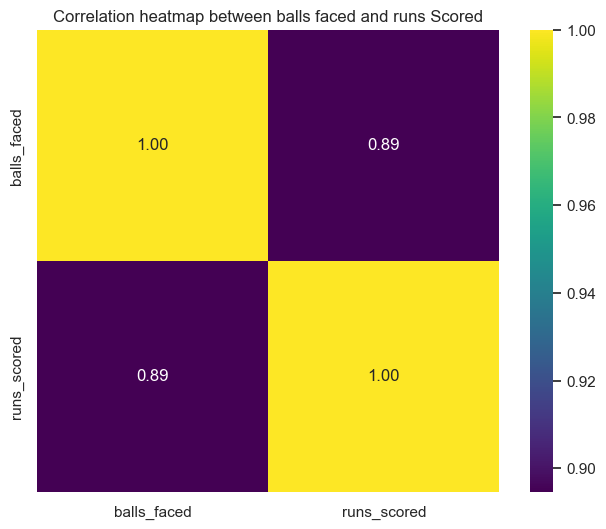

In [199]:
# Create a heatmap
plt.figure(figsize = (8,6))
sns.heatmap(data= correlation_matrix, annot = True , cmap = 'viridis' , square = True , fmt=".2f")
plt.title('Correlation heatmap between balls faced and runs Scored')
plt.show()

In [215]:
## calculate Strike rate per opposition and show heat map
grouped_by_opposition = df_filtered.groupby('opposition')
agg_sum = grouped_by_opposition.agg({'balls_faced':'sum','runs_scored':'sum'})
df_strike_rate = agg_sum

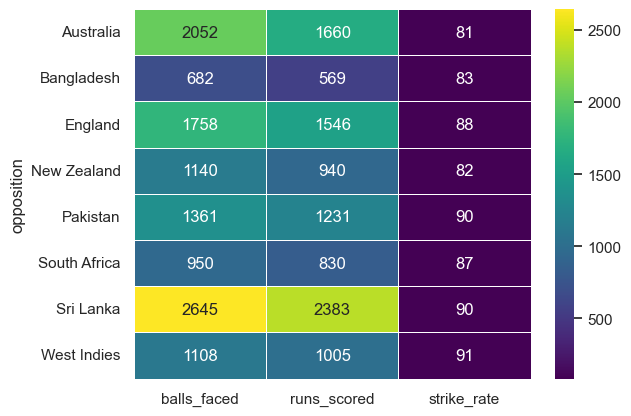

In [221]:
# Calculate Strike Rate

df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored']/df_strike_rate['balls_faced'])*100
sns.heatmap(df_strike_rate,linewidth=0.5,annot=True,fmt='.0f',cmap='viridis')
plt.show()


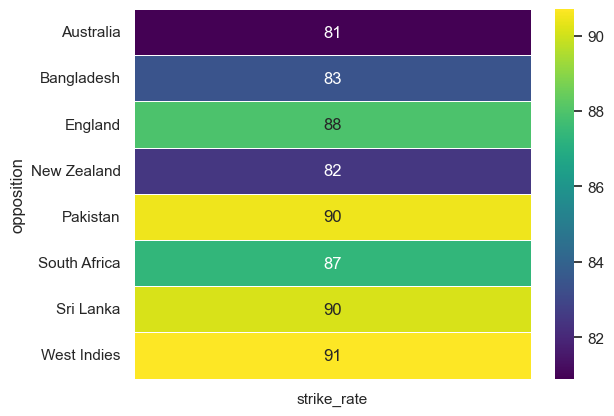

In [223]:
# Bad Graph -- only returns strike rate column
df_strike_rate = df_strike_rate[['strike_rate']]
sns.heatmap(df_strike_rate,linewidth=0.5,annot=True,fmt='.0f',cmap='viridis')
plt.show()